In [103]:
# global var set
import transformers

# model info, change as needed
model_checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'
batch_size = 16
num_epochs = 16

# fileTag = "clean-v1"                      # clean + no phase + combine    (pure clean)
fileTag = "clean-phase-v1"                # clean +   phase  + combine
# fileTag = 'clean-phase-noCombin-v1'       # clean +   phase  + no combine
# fileTag = 'original-noCheat-noCombin-v1'  # raw   +   no Cheat case
# fileTag = 'original'                        # row   +   keep Cheat case     (pure raw) 

fileTag
model_checkpoint

'distilbert-base-uncased-finetuned-sst-2-english'

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [11]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [12]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//2], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//2:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//2], trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//2:]]), 
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//2 else 1 for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'], 
                                  'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//2], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//2:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//2], testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//2:]]), 
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//2 else 1 for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

In [13]:
trainDatasetProcessed.to_csv(f'./dataset/2Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,label
0,['happy'],"{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...",My friend bought me a gift for my birthday.,He stood on his wooden desk and reached for th...,1
1,['excited'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Ronnie decided to help his little sister Sarah...,She decided to face her fears and she dove int...,0
2,['joy'],"{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...",John wanted something to do.,Amy was excited about being in her school marc...,1
3,['lucky'],"{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ...",We've now been together for four Years and thr...,Her timing got better and better.,0
4,['determined'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",John really wanted a new car for his first yea...,Both lost track of times.,0
...,...,...,...,...,...
53113,['defeated'],"{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...",She heard a noise in the bushes.,Dina was too tired to walk.,1
53114,['heartbroken'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",She tried dozens of them on.,The whole town bullied Megman after the critic...,1
53115,['indecisive'],"{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",They spent a long night gambling and drinking.,She kept buying them and taking them back.,1
53116,['guilty'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",She wanted to sit at a different table than them.,I was going over it though.,1


In [14]:
testDatasetProcessed.to_csv(f'./dataset/2Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,label
0,"[""forgetful""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Her faith kept her from being bitter.,Sometimes her brother forgets to knock before ...,1
1,"[""none""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He knows that he needs to study soon.,At first it was hard to teach his brothers son...,1
2,"[""angry""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He remembered that the keys were still in the ...,After she got there the kids said they missed ...,0
3,"[""none""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He ruefully resolved to be more careful in the...,The boy brushed his teeth.,1
4,"[""excited""]","{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...",They hit it off and kept talking to each other.,Melody worked hard all day and followed the re...,1
...,...,...,...,...,...
51886,"[""none""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Fran entered her cake into the competition.,He felt the bat hit the ball.,0
51887,"[""none""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",I needed 13 Stitches that night.,At the end of the night everyone thought they ...,0
51888,"[""proud""]","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...","A chaplain held the service, with Marines.",The practitioner asked for a volunteer to have...,0
51889,"[""sad""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Lily's sister gave her the Bomb as a gift.,Luke lived in the desert with his aunt and uncle.,0


# load dataset

In [104]:
from datasets import load_dataset, load_metric

In [105]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/2Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/2Select-{fileTag}-test.csv'})

Using custom data configuration default-fba8a7089717611c


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-fba8a7089717611c\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [106]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'label'],
        num_rows: 11610
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'label'],
        num_rows: 11129
    })
})

In [107]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['excited', 'eager']",
 'plutchik': "{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 3}",
 'selection0': 'I slept great in it every night.',
 'selection1': 'He prepared the food that evening.',
 'label': 1}

In [108]:
def show_one(example):
    print(f"Context: {example['emotion']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"\nGround truth: option {['A', 'B'][example['label']]}")

In [109]:
show_one(dataset["train"][0])

Context: ['rude', 'positive', 'Jenifer fell']
  A - She is on it during class instead of paying attention.
  B - His wife convinced him to buy a cheap charcoal grill.

Ground truth: option A


# Preprocessing Data

In [110]:
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-cased")

loading file https://huggingface.co/distilbert-base-cased/resolve/main/vocab.txt from cache at C:\Users\JAM_0/.cache\huggingface\transformers\ba377304984dc63e3ede0e23a938bbbf04d5c3835b66d5bb48343aecca188429.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791
loading file https://huggingface.co/distilbert-base-cased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/distilbert-base-cased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/distilbert-base-cased/resolve/main/tokenizer_config.json from cache at C:\Users\JAM_0/.cache\huggingface\transformers\81e970e5e6ec68be12da0f8f3b2f2469c78d579282299a2ea65b4b7441719107.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f
loading configuration file https://huggingface.co/distilbert-base-cased/resolve/main/config.json from cache at C:\Users\JAM_0/.cache\huggingface\transformers\ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f

In [111]:
selectionList = ["selection0", "selection1"]

def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*2 for context in examples["emotion"] ]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList]for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+2] for i in range(0, len(v), 2)] for k, v in tokenized_examples.items()}

In [112]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 2 [27, 28]


In [113]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(1) ]

['[CLS] The following sentences contain emotions : rude, positive, Jenifer fell [SEP] She is on it during class instead of paying attention. [SEP]',
 '[CLS] The following sentences contain emotions : ambitious, desire, thoughtful [SEP] Georgina Watson wanted to be an equestrian. [SEP]',
 '[CLS] The following sentences contain emotions : lucky [SEP] Tom was luckily able to get it back. [SEP]',
 '[CLS] The following sentences contain emotions : cautious, scared, happy [SEP] Their house was empty so he hopped the fence to retrieve the ball. [SEP]',
 '[CLS] The following sentences contain emotions : excited, desire, hopeful, excitement [SEP] The doctor was available to see me right away. [SEP]']

In [114]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/12 [00:00<?, ?ba/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

# Fine-tuning the model

In [115]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
import torch
model = DistilBertForMultipleChoice.from_pretrained("distilbert-base-cased")

# model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

loading configuration file https://huggingface.co/distilbert-base-cased/resolve/main/config.json from cache at C:\Users\JAM_0/.cache\huggingface\transformers\ebe1ea24d11aa664488b8de5b21e33989008ca78f207d4e30ec6350b693f073f.302bfd1b5e031cc1b17796e0b6e5b242ba2045d31d00f97589e12b458ebff27a
Model config DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.19.2",
  "vocab_size": 28996
}

loading weights file https://huggingface.co/distilbert-base-cased/resolve/main/pytorch_model.bin from cache at C:\Users\JAM_0/.cache\huggingface\transformers\9c9f39769dba4c5fe379b4bc82973eb01297bd607954621434eb9f1bc85a23a0.06b428c8733

In [116]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    learning_rate=5e-5, # for bert-base
    # learning_rate=5e-7, # for roberta-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [117]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [118]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [119]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(2)]

['[CLS] The following sentences contain emotions : content, reassured, confident, concerned, concern, grateful, cautious, comfortable [SEP] He is now a millionaire American Indian artist. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] The following sentences contain emotions : content, reassured, confident, concerned, concern, grateful, cautious, comfortable [SEP] Mark now rides his skateboard with protection. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]']

In [120]:
show_one(dataset["train"][8])

Context: ['content', 'reassured', 'confident', 'concerned', 'concern', 'grateful', 'cautious', 'comfortable']
  A - He is now a millionaire American Indian artist.
  B - Mark now rides his skateboard with protection.

Ground truth: option B


# Trainer Defined

In [121]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [122]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [123]:
!nvidia-smi

Tue Jun 21 07:55:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.65       Driver Version: 511.65       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   41C    P8    27W / 370W |   7590MiB / 10240MiB |     50%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [124]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.2 GB
Cached:    2.2 GB


In [125]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForMultipleChoice.forward` and have been ignored: Unnamed: 0, selection1, selection0, emotion, plutchik. If Unnamed: 0, selection1, selection0, emotion, plutchik are not expected by `DistilBertForMultipleChoice.forward`,  you can safely ignore this message.
C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 11610
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 11616


Epoch,Training Loss,Validation Loss,Accuracy
1,0.577700,0.403948,0.809956
2,0.395900,0.414471,0.831162
3,0.171700,0.485884,0.837631
4,0.116500,0.876614,0.828556
5,0.059200,0.910285,0.839518
6,0.045400,1.222179,0.842394
7,0.024700,1.294630,0.842933
8,0.018200,1.413545,0.842124
9,0.010800,1.700999,0.841675
10,0.018000,1.467577,0.847426


Saving model checkpoint to distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500
Configuration saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\config.json
Model weights saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\tokenizer_config.json
Special tokens file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForMultipleChoice.forward` and have been ignored: Unnamed: 0, selection1, selection0, emotion, plutchik. If Unnamed: 0, selection1, selection0, emotion, plutchik are not expected by `DistilBertForMultipleChoice.forward`,  you can safely 

TrainOutput(global_step=11616, training_loss=0.08456336009411075, metrics={'train_runtime': 848.5534, 'train_samples_per_second': 218.914, 'train_steps_per_second': 13.689, 'total_flos': 3714913640412624.0, 'train_loss': 0.08456336009411075, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

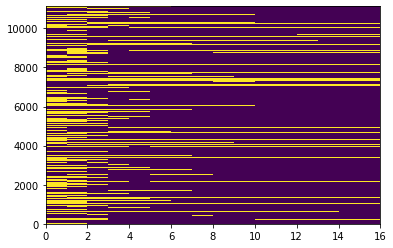

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [128]:
import pandas as pd
if model_checkpoint == 'distilbert-base-uncased-finetuned-sst-2-english':
    model_checkpoint = 'distilbert-base'
dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Emotion] 2Select/TI-{model_checkpoint}-{fileTag}.csv')

In [129]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Emotion] 2Select/ESI-{model_checkpoint}-{fileTag}.csv')